Script to read in the SBML v2 models and save as comets 

In [1]:
import cobra
import cobra.test # for the ijo1366 model
import sys
import copy
import numpy as np
import pandas as pd
import cometspy as c
import os

os.environ['COMETS_HOME'] = '/projectnb2/talbot-lab-data/zrwerbin/interactions/comets_2.10.5_linux'
os.environ['JAVA_HOME'] = '/share/pkg.7/java/12.0.1/install'
os.environ['PATH'] = '/projectnb2/talbot-lab-data/zrwerbin/venvs/comets/bin:/share/pkg.7/gurobi/9.1.1/install/bin:/share/pkg.7/python3/3.8.10/install/bin:/share/pkg.7/java/12.0.1/install/bin:/projectnb/talbot-lab-data/zrwerbin/temporal_forecast/data_construction/microbe/16S_copy_num_normalize/copy_num_normalize:/usr/java/default/jre/bin:/usr/java/default/bin:/usr/lib64/qt-3.3/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/sbin:/opt/dell/srvadmin/bin:/bin:/projectnb2/talbot-lab-data/zrwerbin/interactions/comets_2.10.5_linux'
model_dir = "./models" # model location

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [2]:
# BiGG manually-curated models
#iYO = cobra.io.read_sbml_model(model_dir + '/iYO844.xml')
#iSB = cobra.io.read_sbml_model(model_dir + '/iSB619.xml')
#iMM = cobra.io.read_sbml_model(model_dir + '/iMM904.xml')
#iJN = cobra.io.read_sbml_model(model_dir + '/iJN746.xml')
#iHN = cobra.io.read_sbml_model(model_dir + '/iHN637.xml')
#iCN = cobra.io.read_sbml_model(model_dir + '/iCN718.xml')
#iAF9 = cobra.io.read_sbml_model(model_dir + '/iAF987.xml')
#iAF6 = cobra.io.read_sbml_model(model_dir + '/iAF692.xml')
#Nwino = cobra.io.read_sbml_model('/projectnb2/talbot-lab-data/zrwerbin/interactions/models/sbml/Nwino_bigg_ids.xml')

In [3]:
#Neuro = cobra.io.read_sbml_model('/projectnb2/talbot-lab-data/zrwerbin/interactions/models/sbml/Neuro_bigg_ids.xml')



NEU = cobra.io.read_sbml_model(model_dir + '/sbml/NEU_v3.xml')
NET = cobra.io.read_sbml_model(model_dir + '/sbml/NET_v3.xml')
NMU = cobra.io.read_sbml_model(model_dir + '/sbml/NMU_v3.xml')
NOC = cobra.io.read_sbml_model(model_dir + '/sbml/NOC_v3.xml')
NDE = cobra.io.read_sbml_model(model_dir + '/sbml/NDE_v3.xml')
NWI = cobra.io.read_sbml_model(model_dir + '/sbml/NWI_v3.xml')
NHA = cobra.io.read_sbml_model(model_dir + '/sbml/NHA_v3.xml')
NSP = cobra.io.read_sbml_model(model_dir + '/sbml/NSP_v3.xml')
iAF9 = cobra.io.read_sbml_model(model_dir + '/bigg/iAF987.xml')
iAF6 = cobra.io.read_sbml_model(model_dir + '/bigg/iAF692.xml')
Nitro = cobra.io.read_sbml_model('/projectnb2/talbot-lab-data/zrwerbin/interactions/models/sbml/Nitrospira_bigg_ids2.xml')


Using license file /usr/local/gurobi/gurobi.lic
Set parameter TokenServer to value sccsvc


'' is not a valid SBML 'SId'.


In [4]:
model_list = [NEU, NET, NMU, 
              NOC, NDE, 
              NWI, NHA, NSP, iAF9, iAF6, Nitro]
for mod in model_list:
    solution = mod.optimize()
    print(mod.id, 'Growth Rate: '+str(solution.objective_value)+' 1/h')
    
Nitro.summary()
Nitro.objective = {Nitro.reactions.Ex_cpd11416_e0: 1}
NDE.summary()

NEU Growth Rate: 16.777810339157842 1/h
NET Growth Rate: 0.0 1/h
NMU Growth Rate: 0.0 1/h
NOC Growth Rate: 19.292260036060636 1/h
NDE Growth Rate: 4.6031190734841925 1/h
NWI Growth Rate: 4.603119073484193 1/h
NHA Growth Rate: 4.6031190734841925 1/h
NSP Growth Rate: 4.6031190734841925 1/h
iAF987 Growth Rate: 0.047322435050338375 1/h
iAF692 Growth Rate: 0.026780467547180845 1/h
 Growth Rate: 0.006338097954767458 1/h


Metabolite,Reaction,Flux,C-Number,C-Flux
h2o_e,EX_cpd00001_e0,0.2558,0,0.00%
o2_e,EX_cpd00007_e0,3.843,0,0.00%
pi_e,EX_cpd00009_e0,0.002426,0,0.00%
co2_e,EX_cpd00011_e0,0.2582,1,100.00%
so4_e,EX_cpd00048_e0,0.001773,0,0.00%
cu2_e,EX_cpd00058_e0,1.677E-05,0,0.00%
ca2_e,EX_cpd00063_e0,2.516E-05,0,0.00%
no2_e,EX_cpd00075_e0,8.5,0,0.00%
cl_e,EX_cpd00099_e0,2.516E-05,0,0.00%
k_e,EX_cpd00205_e0,0.0009436,0,0.00%


Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,18.41,0,0.00%
nh4_e,EX_nh4_e,4.603,0,0.00%
no2_e,EX_no2_e,59.84,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
biomass_e,EX_biomass_e,-4.603,0,0.00%
h2o_e,EX_h2o_e,-54.06,0,0.00%
h_e,EX_h_e,-1000,0,0.00%
no_e,EX_no_e,-59.84,0,0.00%
o2_e,EX_o2_e,-42.58,0,0.00%


In [5]:
iRR = cobra.io.read_sbml_model('/projectnb2/talbot-lab-data/zrwerbin/interactions/models/sbml/iRR1083_rGEM_v3.xml')
iJO = cobra.io.read_sbml_model('/projectnb2/talbot-lab-data/zrwerbin/interactions/models/sbml/iJO1366_rGEM_v3.xml')
iPB = cobra.io.read_sbml_model('/projectnb2/talbot-lab-data/zrwerbin/interactions/models/sbml/iPB890_rGEM_v3.xml')
iJN = cobra.io.read_sbml_model('/projectnb2/talbot-lab-data/zrwerbin/interactions/models/sbml/iJN746_rGEM_v3.xml')

In [6]:
model_list = [iRR, iJO, iPB, iJN]
for mod in model_list:
    solution = mod.optimize()
    print(mod.id, 'Growth Rate: '+str(solution.objective_value)+' 1/h')

iRR1083 Growth Rate: 2.3169004125279895 1/h
iJO1366 Growth Rate: 2.702439356885505 1/h
iPB890 Growth Rate: 1.5171672392194477 1/h
iJN746 Growth Rate: 2.0 1/h


In [7]:
NEU.summary()
NEU.reactions.get_by_id('EX_biomass_e')
NEU.reactions.get_by_id('EX_biomass_e').lower_bound = 0
NEU.reactions.get_by_id('EX_biomass_e').upper_bound = .04

Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,67.11,0,0.00%
n2o_e,EX_n2o_e,178.7,0,0.00%
nh2oh_e,EX_nh2oh_e,665.3,0,0.00%
o2_e,EX_o2_e,192.1,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
biomass_e,EX_biomass_e,-16.78,0,0.00%
h2o_e,EX_h2o_e,-87.98,0,0.00%
h_e,EX_h_e,-714.7,0,0.00%
nh4_e,EX_nh4_e,-291.2,0,0.00%
no2_e,EX_no2_e,-714.7,0,0.00%


Reaction identifier,EX_biomass_e
Name,EX_biomass_e
Memory address,0x02b27f045d700
Stoichiometry,biomass_e <=> biomass <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [8]:
# Because none of these guys should be growing so fast!!!!
model_list = [NEU, NET, NMU, 
              NOC, NDE, 
              NWI, NHA, NSP]
for mod in model_list:
    mod.reactions.get_by_id('EX_biomass_e').lower_bound = 0
    mod.reactions.get_by_id('EX_biomass_e').upper_bound = .05

Actually going to keep the limited growth rate for iJN (Pseudomonas putida), because if we release the bound, its growth goes to 3.6 and that's just unrealistic according t:  https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003575

JK not modifying any of the growth rates for now. Since the n-cyclers should be kept to growing slow also.

In [9]:
NEU_c = c.model(NEU)
NET_c = c.model(NET)
NMU_c = c.model(NMU)
NOC_c = c.model(NOC)
NDE_c = c.model(NDE)
NWI_c = c.model(NWI)
NHA_c = c.model(NHA)
NSP_c = c.model(NSP)
iAF9_c = c.model(iAF9)
iAF6_c = c.model(iAF6)
Nitro_c = c.model(Nitro)

model_list = [NEU_c,
              NET_c,
              NMU_c, 
              NOC_c, 
              NDE_c,
              NWI_c,
              NHA_c,
              NSP_c,
             iAF9_c,
             iAF6_c, Nitro_c]
for mod in model_list:
    mod.ensure_sinks_are_not_exchanges()
    mod.open_exchanges()
    
NEU_c.id = "N_europaea_AOB"
NET_c.id = "N_eutropha_AOB"
NMU_c.id = "N_multiformis_AOB"
NOC_c.id = "N_oceani_AOB"
NDE_c.id = "N_defluvii_NOB"
NWI_c.id = "N_winogradskyi_NOB"
NHA_c.id = "N_hamburgensis_NOB"
NSP_c.id = "N_gracilis_NOB"
Nitro_c.id = "Nitrospira_NOB"

In [10]:
iRR_c = c.model(iRR)
iJO_c = c.model(iJO)
iPB_c = c.model(iPB)
iJN_c = c.model(iJN)

model_list = [iRR_c,
              iJO_c,
              iPB_c, 
              iJN_c]
for mod in model_list:
    mod.ensure_sinks_are_not_exchanges()
    mod.open_exchanges()

Our simulated world will be a 100x100 box lattice. The left-hand side, where x = 0, will be the root. The top, where y = 0, will be the air. Therefore, the biomass and the rocks will be distributed everywhere else. To ensure that we don't attempt to place biomass where rocks are placed, we first determine the rock locations. Specifically, we will create 70 rocks which are impervious to any biomass or metabolite. These rocks will have an average size of 15 boxes. To pick these locations, we use the helper function grow_rocks, in the utils subpackage:

In [11]:
from cometspy.utils import grow_rocks, pick_random_locations

grid_width =  20 # narrow, so we can really look at stratification
grid_height =  60

grid_width =  10 # narrow, so we can really look at stratification
grid_height =  100
n_rocks = 50 # 70
rock_locs = grow_rocks(n = n_rocks, xrange = [1,grid_width-1],yrange = [1,grid_height-1],mean_size = 2)

Each species will have biomass seeded at 60 different locations. First we make a copy of the rock_locs so we don't accidentally alter it, and call this copy forbidden_locs. Next we pick the random locations for each species. One big list of locations is created, then species each get a portion of that list.

In [12]:
import copy
forbidden_locs = copy.deepcopy(rock_locs)

founders_per_species = 50 # 60
founders_per_species = 30 # 60
n_species = 15
init_locs = pick_random_locations(n = founders_per_species*n_species, 
                                   xrange = [1,grid_width], yrange = [1,grid_height], 
                                   forbidden_locs = forbidden_locs)

spec1_locs = init_locs[1:founders_per_species]
spec2_locs = init_locs[founders_per_species + 1:founders_per_species*2]
spec3_locs = init_locs[founders_per_species*2 + 1:founders_per_species*3]
spec4_locs = init_locs[founders_per_species*3 + 1:founders_per_species*4]
spec5_locs = init_locs[founders_per_species*4 + 1:founders_per_species*5]
spec6_locs = init_locs[founders_per_species*5 + 1:founders_per_species*6]
spec7_locs = init_locs[founders_per_species*6 + 1:founders_per_species*7]
spec8_locs = init_locs[founders_per_species*7 + 1:founders_per_species*8]
spec9_locs = init_locs[founders_per_species*8 + 1:founders_per_species*9]
spec10_locs = init_locs[founders_per_species*9 + 1:founders_per_species*10]
spec11_locs = init_locs[founders_per_species*10 + 1:founders_per_species*11]
spec12_locs = init_locs[founders_per_species*11 + 1:founders_per_species*12]
spec13_locs = init_locs[founders_per_species*12 + 1:founders_per_species*13]
spec14_locs = init_locs[founders_per_species*13 + 1:founders_per_species*14]
spec15_locs = init_locs[founders_per_species*14 + 1:founders_per_species*15]

In [13]:
# We set the initial population for each species by using a python list comprehension.

NEU_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec1_locs]
NET_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec2_locs]
NMU_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec3_locs]
NOC_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec4_locs]
NDE_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec5_locs]
NWI_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec6_locs]
NHA_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec7_locs]
NSP_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec8_locs]
iAF9_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec9_locs]
iAF6_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec10_locs]
iRR_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec11_locs]
iJO_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec12_locs]
iPB_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec13_locs]
iJN_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec14_locs]
Nitro_c.initial_pop = [[loc[0],loc[1],1e-8] for loc in spec15_locs]

If we wish to take a look at what locations were chosen, we can easily make an image with matplotlib:

Text(0.5, 1.0, 'species 1-3')

Text(0.5, 1.0, 'species 4-6')

Text(0.5, 1.0, 'species 7-9')

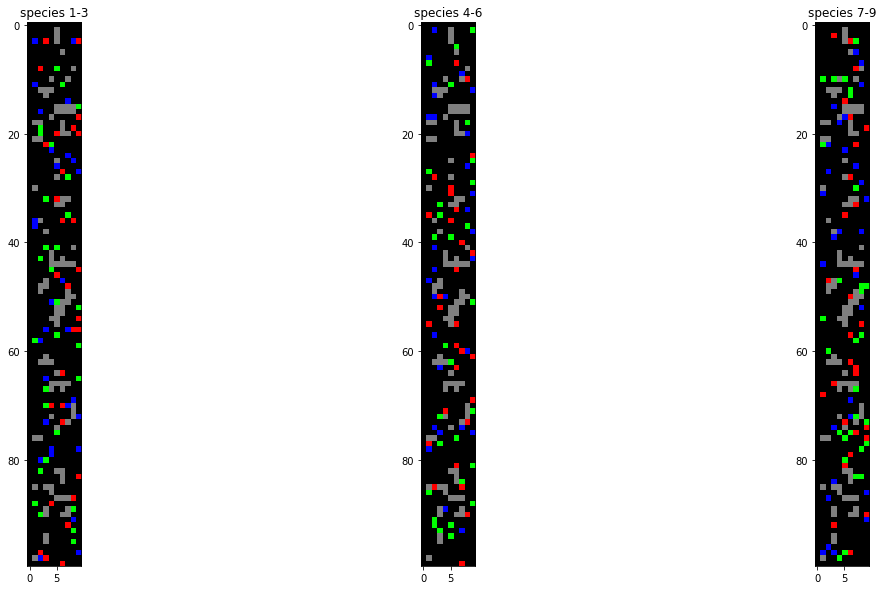

In [14]:
from matplotlib import pyplot as plt
initial_image = np.zeros((grid_height,grid_width,3))
for rock in rock_locs:
    initial_image[rock[1], rock[0]] = .5
for loc in spec1_locs:
    initial_image[loc[1],loc[0],0] = 1
for loc in spec2_locs:
    initial_image[loc[1],loc[0],1] = 1
for loc in spec3_locs:
    initial_image[loc[1],loc[0],2] = 1

initial_image2 = np.zeros((grid_height,grid_width,3))
for rock in rock_locs:
    initial_image2[rock[1],rock[0],0:3] = 0.5 
for loc in spec4_locs:
    initial_image2[loc[1],loc[0],0] = 1
for loc in spec5_locs:
    initial_image2[loc[1],loc[0],1] = 1
for loc in spec6_locs:
    initial_image2[loc[1],loc[0],2] = 1
    
initial_image3 = np.zeros((grid_height,grid_width,3))
for rock in rock_locs:
    initial_image3[rock[1],rock[0],0:3] = 0.5 
for loc in spec7_locs:
    initial_image3[loc[1],loc[0],0] = 1
for loc in spec8_locs:
    initial_image3[loc[1],loc[0],1] = 1
for loc in spec9_locs:
    initial_image3[loc[1],loc[0],2] = 1

initial_figure, initial_axis = plt.subplots(1, 3)
initial_axis[0].imshow(initial_image)
initial_axis[0].set_title("species 1-3")
initial_axis[1].imshow(initial_image2)
initial_axis[1].set_title("species 4-6")
initial_axis[2].imshow(initial_image3)
initial_axis[2].set_title("species 7-9")
initial_figure.set_figheight(10)
initial_figure.set_figwidth(20)
plt.show(initial_figure)

In [15]:
# Km values from supplement of Mellbye et al

#Neuro_c.change_km('EX_nh4_e', 36.5) # Ammonium (NH4) exchange reaction 
#Neuro_c.change_km('EX_cpd00007_e', 12.75) # O2 exchange reaction
#Neuro_c.change_km('EX_cpd00011_e', 3.8) ## CO2 exchange reaction 
#Neuro_c.change_km('EX_cpd00418_e', 12.75) # NO, same as O2 exchange reaction
#
#Nwino_c.change_km('EX_cpd00075_e', 0.464)  # Nitrite (NO2) exchange reaction 
#Nwino_c.change_km('EX_cpd00007_e', 51.8) # O2 exchange reaction
#Nwino_c.change_km('EX_cpd00011_e', 0.37) # CO2 exchange reaction 
#Nwino_c.change_km('EX_cpd00418_e', 51.8) # NO, same as O2 exchange reaction

#Neuro_c.change_vmax('R_Ammonuium_Conversion', 36.5) # Ammonium (NH4) exchange reaction 
#Neuro_c.change_vmax('EX_cpd00007_e', 12.75) # O2 exchange reaction
#Neuro_c.change_vmax('EX_cpd00011_e', 3.8) ## CO2 exchange reaction 
#
#Nwino_c.change_vmax('EX_cpd00075_e', 0.464)  # Nitrite (NO2) exchange reaction 
#Nwino_c.change_vmax('EX_cpd00007_e', 51.8) # O2 exchange reaction
#Nwino_c.change_vmax('EX_cpd00011_e', 0.37) # CO2 exchange reaction 

#Neuro_c.change_vmax('EX_cpd00013_e',1000) 
#Neuro_c.change_vmax('EX_cpd00007_e',1000) 
#Neuro_c.change_vmax('EX_cpd00011_e',1000)

Add models to the layout.

In [16]:
layout = c.layout()
layout.grid = [grid_width,grid_height]
layout.add_barriers(rock_locs)
model_list = [NEU_c,
              NET_c,
              NMU_c, 
              NOC_c, 
              NDE_c,
              NWI_c,
              NHA_c,
              NSP_c,
              iAF9_c,
              iAF6_c,
              iRR_c,
              iJO_c,
              iPB_c,
              iJN_c,
              Nitro_c]
for mod in model_list:
    layout.add_model(mod)

building empty layout model
models will need to be added with layout.add_model()


We want some metabolites available initially. These include all the typical trace nutrients needed, so we start with the helper function.

After that, however, we want oxygen to mostly diffuse from the air, so we set that value lower. We also add a few other trace metabolites homogeneously throughout the environment that were not added with the helper function.

To make the air layer, we set static media, which keep that metabolite at a fixed value.  We also set a static level of zero oxygen at the "bottom," to mimic continuous downwards diffusion.
In a similar fashion, we set a static sink of ammonium where the “root” is.
In contrast to ammonia, which we assume is always entirely consumed by the root, we assume the root drips organic acids and methanol into the environment at fixed rate, so we use a refresh function.

In [17]:
#layout_high_ammonium.add_typical_trace_metabolites()
trace_metabolites = ['ca2_e','cl_e','cobalt2_e',
                     'cu2_e','fe2_e','fe3_e',
                     'h_e','k_e',
                     #'h2o_e',
                     'mg2_e','mn2_e','mobd_e',
                     'na1_e','ni2_e',
                     #'o2_e',
                     'pi_e','so4_e','zn2_e']

for met in trace_metabolites:
    if met in set(layout.media['metabolite']):
        layout.set_specific_metabolite(met,1000)

#layout.set_specific_metabolite('hco3_e',1000)
layout.set_specific_metabolite('co2_e',1000)
#layout.set_specific_metabolite('h2_e',1000)
#layout.set_specific_metabolite('so3_e',1000)
#layout.set_specific_metabolite('nh4_e',0.000001)
layout.set_specific_metabolite('nh4_e',1)
layout.set_specific_metabolite('meoh_e',0.00000001)
#layout.set_specific_metabolite('cys__L_e',0.0000001)
layout.set_specific_metabolite('cys__L_e',1000)
layout.set_specific_metabolite('nac_e',1000)

#layout.set_specific_metabolite('4abz_e',0.0000001)
layout.set_specific_metabolite('nac_e',0.00000001)
#layout.set_specific_metabolite('galam_e',0.001)


#layout.set_specific_metabolite('no2_e',5)
#layout.set_specific_metabolite('no3_e',5)

layout.set_specific_metabolite('no2_e',5)
layout.set_specific_metabolite('no3_e',5)
#layout.set_specific_metabolite('h2o2_e',1000)


# sugars
layout.set_specific_metabolite('glc__D_e',10000) # D-glucose
#layout.set_specific_metabolite('gam_e',10000) # glucosamine
layout.set_specific_metabolite('pyr_e',10000) #pyruvate
layout.set_specific_metabolite('ac_e',1000) # acetate
#layout.set_specific_metabolite('man_e',10000) # mannose


#layout.set_specific_metabolite('co2_e',1000)
layout.set_specific_refresh('co2_e',500)

# set static media of O2 and CO2 at the top and bottom-- the "air" and continuous loss of O2 downwards

# low o2 most places
#layout.set_specific_metabolite('o2_e',0.00001) # majority of the soil: low o2
layout.set_specific_metabolite('o2_e',10000) # majority of the soil: low o2
layout.set_specific_refresh('o2_e',100000)

for x in range(grid_width):
    #layout.set_specific_static_at_location('o2_e', (x,0), .0001) # top
    layout.set_specific_static_at_location('o2_e', (x,grid_height-1), 0.) # bottom: zero, sink for o2
    layout.set_specific_static_at_location('co2_e', (x,grid_height-1), 0.) # bottom: zero, sink for co2
#
# Sink for ammonium (root)

#layout.set_specific_refresh('nh4_e',2)


#layout.set_specific_static_at_location('nh4_e', (0,1), 0.0)

#for x in range(grid_height):
#    layout.set_specific_static_at_location('nh4_e', (0,x), 0.0)
    
#layout.media = layout.media.reset_index(drop=True)

In [18]:
#for x in range(grid_height):
    #layout.set_specific_refresh_at_location('cit_e', (0,x), .0001)
    #layout.set_specific_refresh_at_location('meoh_e', (0,x), .0001)
    #layout.set_specific_refresh_at_location('succ_e', (0,x), .0001)
    #layout.set_specific_refresh_at_location('for_e', (0,x), .0001)

#for x in range(grid_height):
#    layout.set_specific_metabolite_at_location('cit_e', (0,x), .0001)
#    layout.set_specific_metabolite_at_location('meoh_e', (0,x), .0001)
#    layout.set_specific_metabolite_at_location('succ_e', (0,x), .0001)
#    layout.set_specific_metabolite_at_location('for_e', (0,x), .0001)

In [19]:
layout.media.head(60)
layout.media.tail(60)


,diff_c,g_refresh,g_static,g_static_val,init_amount,metabolite
0,0.000005,0,0,0,0,biomass_e
1,0.000005,500,0,0,1000,co2_e
2,0.000005,0,0,0,0,h2o_e
3,0.000005,0,0,0,1000,h_e
4,0.000005,0,0,0,0,n2o_e
5,0.000005,0,0,0,0,nh2oh_e
6,0.000005,0,0,0,1,nh4_e
7,0.000005,0,0,0,5,no2_e
8,0.000005,0,0,0,0,no_e
9,0.000005,100000,0,0,10000,o2_e


,diff_c,g_refresh,g_static,g_static_val,init_amount,metabolite
158,0.000005,0,0,0,0,thr_L_e
159,0.000005,0,0,0,0,trp_L_e
160,0.000005,0,0,0,0,tyr_L_e
161,0.000005,0,0,0,0,val_L_e
162,0.000005,0,0,0,0,5mtr_e
163,0.000005,0,0,0,0,acser_e
164,0.000005,0,0,0,0,ala__D_e
165,0.000005,0,0,0,0,alaala_e
166,0.000005,0,0,0,0,arg__L_e
167,0.000005,0,0,0,0,asn__L_e


In [20]:
import copy

layout_diff06 = copy.deepcopy(layout) # default is 5.e-6
#layout_diff06.set_metabolite_diffusion(1e-06)

In [21]:
# Med ammonium: 10
layout_diff_06_nh4_10 = copy.deepcopy(layout_diff06)
#layout_diff_06_nh4_10.set_specific_metabolite('nh4_e',10)
#layout_diff_06_nh4_10.set_specific_refresh('nh4_e',10)

# Reset indices? Not sure if that's necessary
layout_diff_06_nh4_10.media   =  layout_diff_06_nh4_10.media.reset_index(drop=True)

We are now done prepping the models and the layout. Next we setup the simulation parameters. Note the positive death rate.


In [22]:
params = c.params()
params.set_param('timeStep', 2) # in hours
params.set_param('spaceWidth', .1) # one cell = one cm3
params.set_param('maxCycles', 400)
params.set_param('maxSpaceBiomass', 10) # gDW # max biomass allowed per cell
params.set_param('deathRate', 0.0001) # die at rate of 1/10000 per hour
params.set_param('defaultKm', 0.000001)

params.set_param('BiomassLogName', 'biomass')
params.set_param('MediaLogName', 'media')
params.set_param('SpecificMediaLogName', 'specific_media')
params.set_param('TotalBiomassLogName', 'total_biomass')
params.set_param('useLogNameTimeStamp', False)

params.set_param('writeBiomassLog', True)
params.set_param('writeTotalBiomassLog', True)
params.set_param('writeMediaLog', True)
params.set_param("writeFluxLog", False)

params.set_param('BiomassLogRate', 10)
params.set_param('totalBiomassLogRate', 10)
params.set_param('MediaLogRate', 10)
params.set_param("FluxLogRate", 400)

params.set_param("allowCellOverlap", True)

params.set_param('numRunThreads', 28)
#params.set_param("writeSpecificMediaLog", True)
params.set_param("specificMediaLogRate", 100) # time steps
params.set_param("specificMedia", "nh4_e,no3_e,no2_e,no3_e,no2_e,n2o_e,no2_e") # metabolites to track

In [23]:
# Read in file with parameters
observed_params = pd.read_csv("/projectnb2/talbot-lab-data/zrwerbin/interactions/data/input_params.csv")
observed_params


,Unnamed: 0,sampleID,netNminugPerGramPerDay,netNitugPerGramPerDay,soilInorganicNugPerGram,soilAmmoniumNugPerGram,soilNitrateNitriteNugPerGram,nitrogenPercent,d15N,organicd13C,...,asDate,dateID,horizon,plot_date,moisture,diffusion,ammonium,nitrate,id,rownames
0,1,HARV_001-M-27-32.5-20180710,0.046,0.034,0.715,0.715,0.000,0.17,5.1,-27.2,...,2018-07-10,201807,M,HARV_001-201807,0.5,0.000005,0.1,0.1,sim_diff_5e-06_nh4_0.1_no3_0.1_mois_0.5,1
1,2,HARV_001-M-28-35-20180418,-0.001,0.014,1.822,1.822,0.000,NaN,NaN,NaN,...,2018-04-18,201804,M,HARV_001-201804,1.0,0.000001,0.2,0.1,sim_diff_1e-06_nh4_0.2_no3_0.1_mois_1,2
2,3,HARV_001-M-35-37-20181010,0.032,-0.018,2.318,1.232,1.087,NaN,NaN,NaN,...,2018-10-10,201810,M,HARV_001-201810,1.0,0.000001,0.1,0.2,sim_diff_1e-06_nh4_0.1_no3_0.2_mois_1,3
3,4,HARV_001-M-37.5-12.5-20180418,0.053,0.006,1.913,1.898,0.015,NaN,NaN,NaN,...,2018-04-18,201804,M,HARV_001-201804,0.5,0.000005,0.2,0.1,sim_diff_5e-06_nh4_0.2_no3_0.1_mois_0.5,4
4,5,HARV_001-M-8-19-20181010,-0.061,-0.001,3.212,2.971,0.241,NaN,NaN,NaN,...,2018-10-10,201810,M,HARV_001-201810,1.0,0.000001,0.2,0.2,sim_diff_1e-06_nh4_0.2_no3_0.2_mois_1,5
5,6,HARV_001-O-28-35-20180418,0.625,-0.011,7.454,5.406,2.048,NaN,NaN,NaN,...,2018-04-18,201804,O,HARV_001-201804,4.0,0.000004,0.2,0.2,sim_diff_4e-06_nh4_0.2_no3_0.2_mois_4,6
6,7,HARV_001-O-35-37-20181010,-0.025,0.005,4.770,4.170,0.600,NaN,NaN,NaN,...,2018-10-10,201810,O,HARV_001-201810,3.0,0.000003,0.2,0.2,sim_diff_3e-06_nh4_0.2_no3_0.2_mois_3,7
7,8,HARV_001-O-37.5-5.5-20181010,0.064,0.142,2.786,2.773,0.013,NaN,NaN,NaN,...,2018-10-10,201810,O,HARV_001-201810,2.0,0.000002,0.2,0.1,sim_diff_2e-06_nh4_0.2_no3_0.1_mois_2,8
8,9,HARV_001-O-9-34.5-20180418,0.046,0.204,9.927,9.927,0.000,NaN,NaN,NaN,...,2018-04-18,201804,O,HARV_001-201804,3.0,0.000003,0.4,0.1,sim_diff_3e-06_nh4_0.4_no3_0.1_mois_3,9
9,10,HARV_002-M-12-2.5-20181008,0.062,-0.038,2.718,1.629,1.089,NaN,NaN,NaN,...,2018-10-08,201810,M,HARV_002-201810,0.5,0.000005,0.2,0.2,sim_diff_5e-06_nh4_0.2_no3_0.2_mois_0.5,10


In [24]:
sim_list = [21,22,23,24,25,26,27,28,29,30]
sim_list = range(33, 41)
for i in sim_list:
    #print(params["rownames"] == 1)
    #print(i)
    specific_scenario = observed_params[observed_params["rownames"] == i]
    
    print(specific_scenario)
    
    diff_constant = specific_scenario.iloc[0]["diffusion"] * 2
    ammon_conc = specific_scenario.iloc[0]["ammonium"] * 2
    nitrate_conc = specific_scenario.iloc[0]["nitrate"] * 2
    h2o = specific_scenario.iloc[0]["moisture"] * 2
    
    #print(diff_constant)
    #print(ammon_conc)
    #print([diff_constant, ammon_conc, nitrate_conc, h2o])
    
    # Create output path from parameters
    output_dir = (specific_scenario.iloc[0]["id"] + '/')
    print(output_dir)
    
    #output_path = os.path.join("data/simulation_output/" + output_dir)
    output_path = os.path.join("data/simulation_output/exp_" + output_dir)
    
    #if os.path.exists(output_path):
    #    continue
    
    
    os.makedirs(output_path, exist_ok = True)
    
    #print(output_path)
    
    # Modify layout according to parameters
    specific_layout = copy.deepcopy(layout)
    specific_layout.set_metabolite_diffusion(diff_constant)
    specific_layout.set_specific_metabolite('nh4_e', ammon_conc)
    specific_layout.set_specific_metabolite('h2o_e', h2o)
    specific_layout.set_specific_metabolite('no3_e', nitrate_conc)
    specific_layout.media   =  specific_layout.media.reset_index(drop=True)
    
    sim = c.comets(specific_layout, params, relative_dir = output_path)
    sim.run(delete_files=False)

    Unnamed: 0                   sampleID  netNminugPerGramPerDay  \
32          33  HARV_021-O-6.5-2-20180712                  -0.015   

    netNitugPerGramPerDay  soilInorganicNugPerGram  soilAmmoniumNugPerGram  \
32                 -0.041                    6.711                   5.781   

    soilNitrateNitriteNugPerGram  nitrogenPercent  d15N  organicd13C  ...  \
32                          0.93              1.6  -2.0        -28.9  ...   

        asDate  dateID  horizon        plot_date  moisture  diffusion  \
32  2018-07-12  201807        O  HARV_021-201807       2.0   0.000002   

    ammonium  nitrate                                     id  rownames  
32       0.3      0.2  sim_diff_2e-06_nh4_0.3_no3_0.2_mois_2        33  

[1 rows x 35 columns]
sim_diff_2e-06_nh4_0.3_no3_0.2_mois_2/
this should be performed prior to setting specific metabolite diffusion

Running COMETS simulation ...


KeyboardInterrupt: 

In [ ]:
print(sim.run_output)

In [49]:
#sim_list = [21,22,23,24,25,26,27,28,29,30]
i = 1
#print(params["rownames"] == 1)
#print(i)
specific_scenario = observed_params[observed_params["rownames"] == i]

print(specific_scenario)

diff_constant = specific_scenario.iloc[0]["diffusion"] * 2
ammon_conc = specific_scenario.iloc[0]["ammonium"] * 2
nitrate_conc = specific_scenario.iloc[0]["nitrate"] * 2
h2o = specific_scenario.iloc[0]["moisture"] * 2

print(diff_constant)
print(ammon_conc)
print([diff_constant, ammon_conc, nitrate_conc, h2o])

# Create output path from parameters
#output_dir = ('diff_' + str(diff_constant) + '_nh4_' + str(ammon_conc) + '_no3_' + str(nitrate_conc) + '/')
output_dir = (specific_scenario.iloc[0]["id"] + 'static/')
print(output_dir)

output_path = os.path.join("data/simulation_output/" + output_dir)


#os.makedirs(output_path, exist_ok = True)

#print(output_path)

# Modify layout according to parameters
#specific_layout = copy.deepcopy(layout)
#specific_layout.set_metabolite_diffusion(diff_constant)
#specific_layout.set_specific_metabolite('nh4_e', ammon_conc)
#specific_layout.set_specific_static('h2o_e', h2o)
#specific_layout.set_specific_metabolite('no3_e', nitrate_conc)
#specific_layout.media   =  specific_layout.media.reset_index(drop=True)
#
#sim = c.comets(specific_layout, params, relative_dir = output_path)
#sim.run(delete_files=False)

   Unnamed: 0                     sampleID  netNminugPerGramPerDay  \
0           1  HARV_001-M-27-32.5-20180710                   0.046   

   netNitugPerGramPerDay  soilInorganicNugPerGram  soilAmmoniumNugPerGram  \
0                  0.034                    0.715                   0.715   

   soilNitrateNitriteNugPerGram  nitrogenPercent  d15N  organicd13C  ...  \
0                           0.0             0.17   5.1        -27.2  ...   

       asDate  dateID  horizon        plot_date  moisture  diffusion  \
0  2018-07-10  201807        M  HARV_001-201807         1   0.000001   

   ammonium  nitrate                                     id  rownames  
0       0.1      0.1  sim_diff_1e-06_nh4_0.1_no3_0.1_mois_1         1  

[1 rows x 35 columns]
2e-06
0.2
[2e-06, 0.2, 0.2, 2]
sim_diff_1e-06_nh4_0.1_no3_0.1_mois_1static/


,cycle,N_europaea_AOB,N_eutropha_AOB,N_multiformis_AOB,N_oceani_AOB,N_defluvii_NOB,N_winogradskyi_NOB,N_hamburgensis_NOB,N_gracilis_NOB,iAF987,iAF692,iRR1083,iJO1366,iPB890,iJN746,Nitrospira_NOB
0,0,2.900000e-07,2.900000e-07,2.900000e-07,2.900000e-07,2.900000e-07,2.900000e-07,2.900000e-07,2.900000e-07,2.900000e-07,2.900000e-07,2.900000e-07,2.900000e-07,2.900000e-07,2.900000e-07,2.900000e-07
1,10,1.750943e+01,2.709373e-07,2.703299e-07,1.750855e+01,1.690866e+01,1.750986e+01,1.690336e+01,7.861023e+00,2.697219e-07,2.687036e-07,5.275789e-05,2.699169e-07,5.690285e-04,2.691007e-07,3.561160e-07
2,20,1.396638e+02,2.532424e-07,2.521014e-07,1.241248e+02,1.224881e+02,1.825894e+02,1.262426e+02,1.551591e+02,2.509604e-07,2.490365e-07,1.736078e-03,2.513113e-07,3.955162e-02,2.497675e-07,5.094282e-07
3,30,1.567822e+02,2.368119e-07,2.352037e-07,1.340248e+02,1.246181e+02,2.050873e+02,1.315487e+02,1.948124e+02,2.335985e-07,2.308703e-07,2.498291e-02,2.340696e-07,1.080046e+00,2.318793e-07,8.608981e-07
4,40,1.754113e+02,2.215503e-07,2.195349e-07,1.424917e+02,1.256333e+02,2.205776e+02,1.367979e+02,2.184146e+02,2.175284e-07,2.140869e-07,3.788842e-01,2.180873e-07,2.038432e+01,2.153246e-07,3.487046e-06


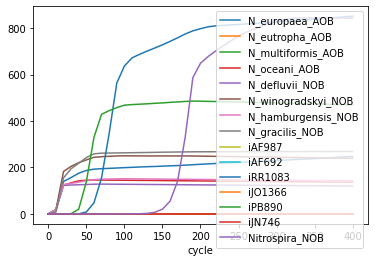

In [59]:
ax1 = sim.total_biomass.plot(x = 'cycle')
sim.total_biomass.head()

<AxesSubplot:>

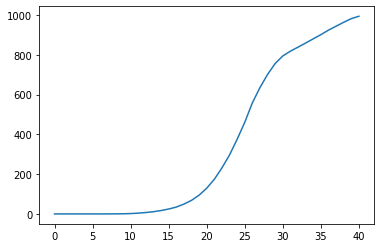

In [29]:
#sim.total_biomass['N_winogradskyi_NOB'].plot(x = 'cycle')
#sim.total_biomass['iJN746'].plot(x = 'cycle')
sim.total_biomass['iRR1083'].plot(x = 'cycle')
#sim.total_biomass['N_europaea_AOB'].plot(x = 'cycle')

<AxesSubplot:xlabel='cycle'>

Text(0, 0.5, 'mmol')

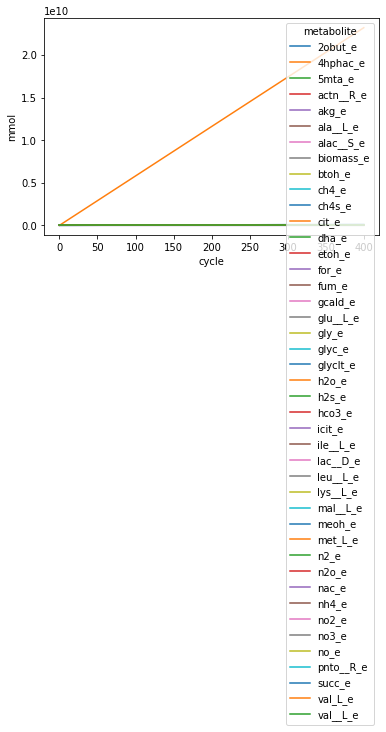

In [26]:
media = sim.get_metabolite_time_series(upper_threshold = 900)
media.plot(x = "cycle")
plt.ylabel("mmol")

metabolite,cycle,2obut_e,3httdca_e,4hbald_e,4hphac_e,5mta_e,ac_e,acald_e,akg_e,ala__L_e,...,no3_e,no_e,o2_e,pi_e,pnto__R_e,pyr_e,so4_e,succ_e,val__L_e,zn2_e
0,0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,600000.000000,0.0,0.0,0.0,...,3000.000000,0.000000,5.900000e+06,600000.000000,0.000000e+00,6.000000e+06,600000.000000,0.000000e+00,0.000000e+00,600000.000000
1,10,2910000.0,0.0,0.0,5.820000e+08,6.933394e-07,580000.003411,0.0,0.0,0.0,...,2899.037433,0.000008,5.266760e+06,580000.000616,3.448248e-07,5.800000e+06,580000.000061,1.333662e-08,8.079252e-07,580000.000171
2,20,5810000.0,0.0,0.0,1.162000e+09,1.157139e-05,580000.175718,0.0,0.0,0.0,...,2275.905916,321.342183,5.050638e+06,580000.000108,6.591929e-07,5.800000e+06,579999.999844,4.806677e-13,4.935571e-07,580000.000334
3,30,8710000.0,0.0,0.0,1.742000e+09,1.157139e-05,580000.501356,0.0,0.0,0.0,...,3517.530468,324.806627,4.884575e+06,580000.000430,8.398035e-07,5.800000e+06,579999.999696,7.281028e-11,3.129465e-07,580000.000494
4,40,11610000.0,0.0,0.0,2.322000e+09,1.157139e-05,580000.828921,0.0,0.0,0.0,...,5526.518863,374.981888,4.743213e+06,579999.999055,9.496467e-07,5.800000e+06,579999.998365,5.045586e-14,2.031033e-07,580000.000638


<AxesSubplot:xlabel='cycle'>

<AxesSubplot:xlabel='cycle'>

<AxesSubplot:xlabel='cycle'>

<AxesSubplot:xlabel='cycle'>

<AxesSubplot:xlabel='cycle'>

<AxesSubplot:xlabel='cycle'>

<AxesSubplot:xlabel='cycle'>

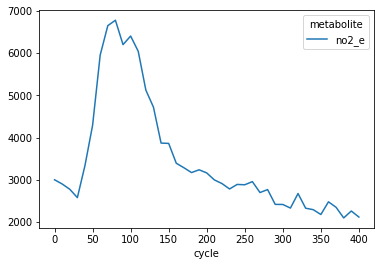

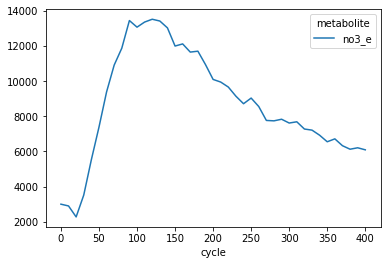

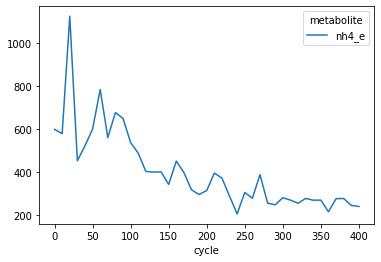

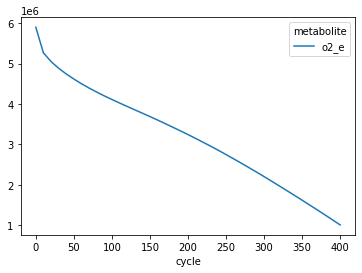

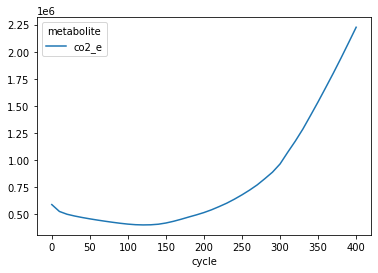

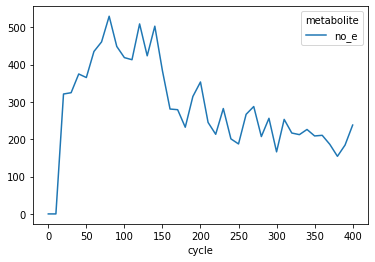

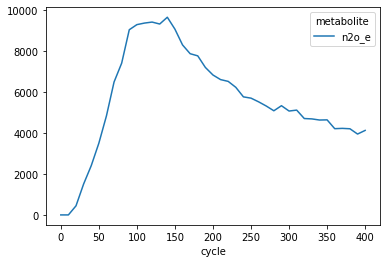

In [135]:
upper_threshold = 9

total_media = sim_diff_06_nh4_10.media.groupby(by = ["metabolite", "cycle"]).agg(func = sum).reset_index().drop(columns = ["x", "y"])
total_media = total_media.pivot(columns = "metabolite", values = "conc_mmol", index = ["cycle"]).reset_index().fillna(0.)
total_media.head()

#total_media[['nh4_e','no2_e','no3_e','cycle']].plot(x = "cycle")
#total_media[['no2_e','no3_e','cycle']].plot(x = "cycle")
total_media[['no2_e','cycle']].plot(x = "cycle")
total_media[['no3_e','cycle']].plot(x = "cycle")
total_media[['nh4_e','cycle']].plot(x = "cycle")
total_media[['o2_e','cycle']].plot(x = "cycle")
total_media[['co2_e','cycle']].plot(x = "cycle")
#total_media[['glc__D_e','cycle']].plot(x = "cycle")
#total_media[['gam_e','cycle']].plot(x = "cycle")
#total_media[['pyr_e','cycle']].plot(x = "cycle")
#total_media[['ac_e','cycle']].plot(x = "cycle")
#total_media[['man_e','cycle']].plot(x = "cycle")
total_media[['no_e','cycle']].plot(x = "cycle")
total_media[['n2o_e','cycle']].plot(x = "cycle")

<Figure size 4320x720 with 0 Axes>

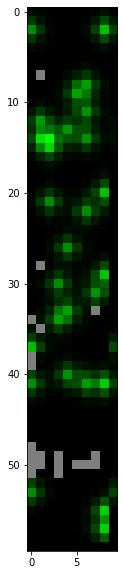

In [136]:

#im4 = sim_diff_06_nh4_10.get_biomass_image('iYO844', params.all_params['maxCycles'])
im5 = sim_diff_06_nh4_10.get_biomass_image('N_europaea_AOB', params.all_params['maxCycles'])
#im6 = sim_diff_06_nh4_10.get_biomass_image('N_winogradskyi_NOB', params.all_params['maxCycles'])

final2 = np.zeros((grid_height,grid_width,3))
#final2[:,:,0] = im4 / np.max(im4)
#final2[:,:,1] = im5 / np.max(im5)
#final2[:,:,2] = im6 / np.max(im6)
#final2[:,:,0] = np.transpose(im4 / np.max(im4))
final2[:,:,1] = np.transpose(im5 / np.max(im5))
#final2[:,:,2] = np.transpose(im6 / np.max(im6))
for rock in rock_locs:
    final2[rock[1]-1,rock[0]-1,0:3] = 0.5 
    
from matplotlib import pyplot as plt
plt.figure(figsize = (60,10))
plt.imshow(final2)

Below here, we show a handful of metabolites. 

Text(0.5, 1.0, 'nh4')

Text(0.5, 1.0, 'o2')

Text(0.5, 1.0, 'co2')

Text(0.5, 1.0, 'nh4')

Text(0.5, 1.0, 'o2')

Text(0.5, 1.0, 'co2')

Text(0.5, 1.0, 'nh4')

Text(0.5, 1.0, 'o2')

Text(0.5, 1.0, 'co2')

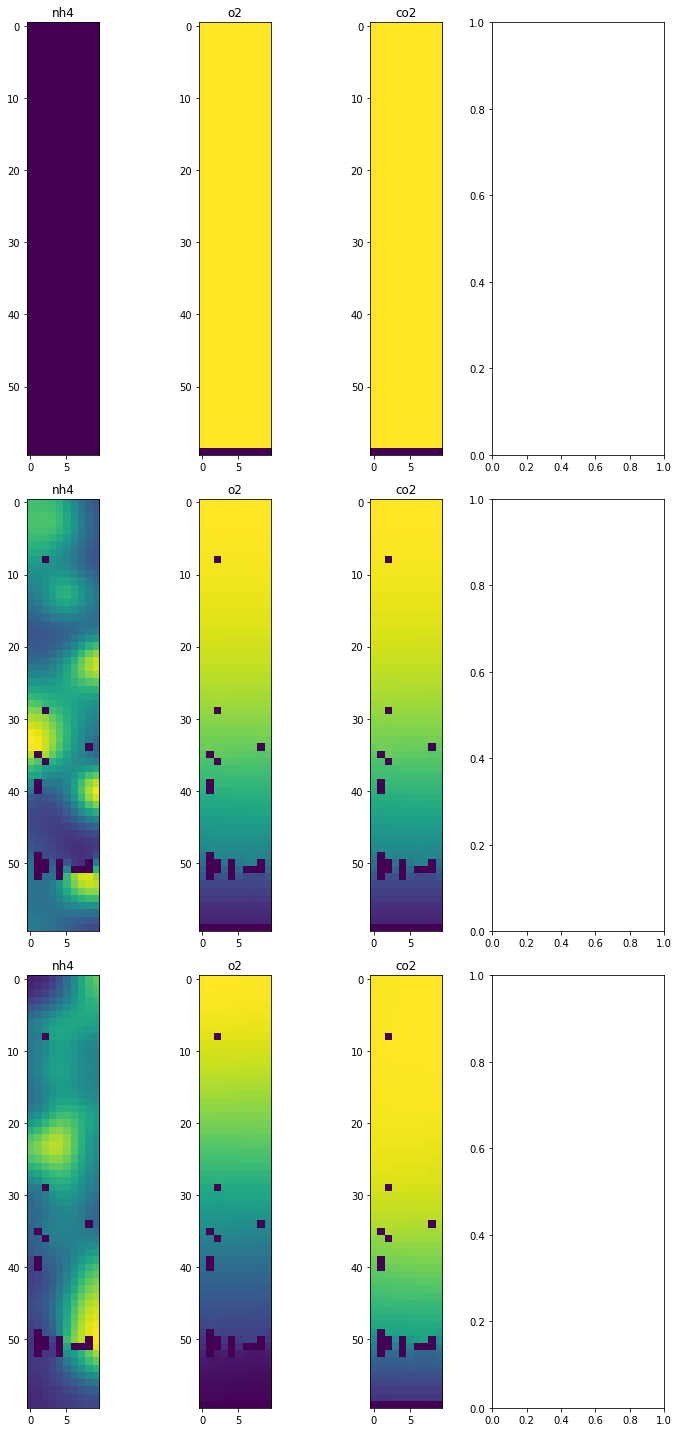

In [137]:
figure, axis = plt.subplots(3, 4,figsize=(10,20))

## INITIAL

axis[0,0].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("nh4_e",0)))
axis[0,0].set_title("nh4")

axis[0,1].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("o2_e",0)))
axis[0,1].set_title("o2")

axis[0,2].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("co2_e",0)))
axis[0,2].set_title("co2")

#axis[0,3].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("succ_e",0)))
#axis[0,3].set_title("succ_e")


## MIDPOINT

axis[1,0].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("nh4_e",100)))
axis[1,0].set_title("nh4")

axis[1,1].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("o2_e",100)))
axis[1,1].set_title("o2")

axis[1,2].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("co2_e",100)))
axis[1,2].set_title("co2")

#axis[1,3].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("succ_e",100)))
#axis[1,3].set_title("succ_e")


## FINAL

axis[2,0].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("nh4_e",params.all_params['maxCycles'])))
axis[2,0].set_title("nh4")

axis[2,1].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("o2_e",params.all_params['maxCycles'])))
axis[2,1].set_title("o2")

axis[2,2].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("co2_e",params.all_params['maxCycles'])))
axis[2,2].set_title("co2")

#axis[2,3].imshow(np.transpose(sim_diff_06_nh4_10.get_metabolite_image("succ_e",params.all_params['maxCycles'])))
#axis[2,3].set_title("succ_e")
plt.tight_layout()
#plt.show()